In [1]:
# 1. Prepare data for analysis (line 2-7)

In [2]:
import pandas as pd # to read and manipulate data
import numpy as np # to do numerical analysis and visualization
import matplotlib.pyplot as plt
import os 

In [3]:
# os.listdir gives list of all directories/ files from the path

# we're not doing pd.read_csv because we're dealing with multiple directories at once.

os.listdir('C:\datascience\DataScience04\Sales_Data')

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [4]:
allfiles= [file for file in os.listdir('C:\datascience\DataScience04\Sales_Data')]

In [5]:
for file in allfiles:
    print (file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [6]:
# make a new DataFrame, named all_data to basically transfer all the file in 'allfiles' into a new dataframe
path='C:\datascience\DataScience04\Sales_Data'
all_data=pd.DataFrame()

for file in allfiles:
    current_df= pd.read_csv (path+'/'+file)
    all_data= pd.concat([all_data, current_df])
    
all_data.shape

(186850, 6)

In [7]:
# convert the dataframe all_data into csv, at a particular location you want to store in your computer

# remember... to_csv

# if you don't want index of the data, do index=False

all_data.to_csv('C:\datascience\DataScience04\Sales_Data/all_data.csv', index=False)

In [12]:
# 2. Remove missing values from prepared dataframe, all_data

In [8]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [9]:
# find all the missing values
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
# how=all will drop the entire entry where NA lies

all_data= all_data.dropna(how='all')
all_data.shape

(186305, 6)

In [20]:
#  Now your dataframe is good to go, without NA values.

all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [63]:
# 3.Now find the best month for sale

# First, let's extricate month out of the dataframe, and make a separate month column

In [21]:
all_data['Order Date'].head()

0    04/19/19 08:46
2    04/07/19 22:30
3    04/12/19 14:38
4    04/12/19 14:38
5    04/30/19 09:27
Name: Order Date, dtype: object

In [29]:
# you can see how to split the month out of order date

'04/19/19 08:46'.split('/')[0]

'04'

In [27]:
# define a split function by using split() function

def split(x):
    return x.split('/')[0]

In [26]:
all_data['Order Date'].apply(split)

0        04
2        04
3        04
4        04
5        04
         ..
11681    09
11682    09
11683    09
11684    09
11685    09
Name: Order Date, Length: 186305, dtype: object

In [30]:
# you can create a new column

all_data['month']= all_data['Order Date'].apply(split)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [42]:
all_data.drop( 'Order Date', axis=1, inplace=True)

In [43]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",04


In [45]:
# you can see dtypes is object, which is strings. Strings can be number or characters

# number in string cannot be used for mathematical calculations

all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Purchase Address    object
month               object
dtype: object

In [46]:
all_data['month']= all_data['month'].astype(int)

all_data['Quantity Ordered'].astype(float)
all_data['Price Each'].astype(float)

ValueError: invalid literal for int() with base 10: 'Order Date'

In [47]:
all_data['month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [54]:
# let's get rid of this 'order date' within month

# make a filter to get rid of a certain value within all_data['month'], which is 'Order Date'

# do dataframe[ -filter] to get rid of the value the filter is applied on from the datafrmae


filter= (all_data['month']=='Order Date')
all_data= all_data[ -filter]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",04


In [56]:
# Now you can see 'Order Date' value is removed from the dataframe's column, all_data['month']

all_data['month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [58]:
# perform the function again, which previously had an error

# convert 

all_data['month']= all_data['month'].astype(int)

In [72]:
all_data['Quantity Ordered']= all_data['Quantity Ordered'].astype(int)

In [60]:
all_data['Price Each']=  all_data['Price Each'].astype(float)

In [73]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Purchase Address     object
month                 int32
dtype: object

In [88]:
# make a new column 'sales' which multiplies two columns from the dataframe

all_data ['sales']= all_data['Quantity Ordered']* all_data['Price Each']

In [81]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",4,11.99


In [86]:
month=[]
sales_total=[]

for mon, month_df in all_data.groupby('month'):
    month.append(mon)
    sales_total.append(month_df['sales'].sum())

In [87]:
month_df=pd.DataFrame(zip(month, sales_total))
month_df.columns= ['month', 'sales total']
month_df

,month,sales total
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


In [100]:
!pip install plotly

import plotly.graph_objs as go
from plotly.offline import iplot

In [105]:
trace1= go.Bar(x=month_df['month'], y= month_df['sales total'])
iplot([trace1])

In [102]:
# another simpler way to do this is... groupby by 'month' and for each and every month, access 'sales' column and then sum()

all_data.groupby('month')['sales'].sum()


month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: sales, dtype: float64

Text(0.5, 1.0, 'Total Sales per Month')

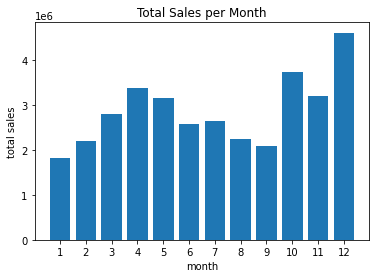

In [107]:
# plt.bar(x, y)

months=range(1,13)
plt.bar(months, all_data.groupby('month')['sales'].sum())
plt.xticks(months)
plt.xlabel('month')
plt.ylabel('total sales')
plt.title('Total Sales per Month')

In [108]:
# Thus the best months for sales was 12 -> 10 -> 4